# Coursework 1 for Stochastic Simulation

## Q1: Sampling from chi-squared using rejection sampling
### Q1.1
To compute $M_{\lambda}$, for $x>0$,
\begin{equation}
\begin{split}
M_{\lambda} &= \sup_{x}\frac{p_{\nu}(x)}{q_{\lambda}(x)}\\
&= \sup_{x}\frac{\frac{1}{2^{\frac{\nu}{2}}\Gamma(\frac{\nu}{2})}x^{\frac{\nu}{2}-1}e^{-\frac{x}{2}}}{\lambda e^{-\lambda x}}\\
&= \frac{1}{\lambda2^{\frac{\nu}{2}}\Gamma(\frac{\nu}{2})}\sup_{x}x^{\frac{\nu}{2}-1}e^{(\lambda-\frac{1}{2})x}
\end{split}
\end{equation}
Let $f(x)=x^{\frac{\nu}{2}-1}e^{(\lambda-\frac{1}{2})x}$. Then $M_{\lambda}=\frac{1}{\lambda2^{\frac{\nu}{2}}\Gamma(\frac{\nu}{2})}\sup_{x} f(x)$. To find $x^*=\argmax f(x)$, one could compute the first and second derivatives of $\log f(x)=(\frac{\nu}{2}-1)\log(x)+(\lambda-\frac{1}{2})x$ by the monotone increasing property of $\log$.
\begin{equation}
\frac{d\log f(x)}{dx} = (\frac{\nu}{2}-1)\frac{1}{x}+(\lambda-\frac{1}{2})
\end{equation}
Stationary point $x^*=\frac{\nu-2}{1-2\lambda}$ can be found by setting $\frac{d\log f(x)}{dx}=0$. Since $\nu>2$ and $0<\lambda<\frac{1}{2}$, $x^*>0$ is well-defined. To examine the convexity of $x^*$,
\begin{equation}
\frac{d^2\log f(x)}{dx^2}=-(\frac{\nu}{2}-1)\frac{1}{x^2},
\end{equation}
which is smaller than $0$ for all $x>0$. Thus, $x^*=\frac{\nu-2}{1-2\lambda}$ is indeed a maximiser. By substituting it into $M_\lambda$,
\begin{equation}
\begin{split}
M_\lambda&=\frac{1}{\lambda2^{\frac{\nu}{2}}\Gamma(\frac{\nu}{2})}\left(\frac{\nu-2}{1-2\lambda}\right)^{\frac{\nu}{2}-1}e^{{\left(\lambda-\frac{1}{2}\right)\left(\frac{\nu-2}{1-2\lambda}\right)}}\\
&= \frac{1}{\lambda2^{\frac{\nu}{2}}\Gamma(\frac{\nu}{2})}\left(\frac{\nu-2}{1-2\lambda}\right)^{\frac{\nu}{2}-1}e^{-\left(\frac{\nu}{2}-1\right)}\\
&= \frac{e^{-\left(\frac{\nu}{2}-1\right)}\left(\nu-2\right)^{\frac{\nu}{2}-1}}{2^{\frac{\nu}{2}}\Gamma(\frac{\nu}{2})} \frac{1}{\lambda(1-2\lambda)^{\frac{\nu}{2}-1}}
\end{split}
\end{equation}
### Q1.2
Since we want to find a $M_{\lambda}$ making the acceptance rate ($\frac 1{M_{\lambda}}$) as large as possible, the target $\lambda^*$ will minimise $M_{\lambda}$. Let $g(\lambda)=\frac{1}{\lambda(1-2\lambda)^{\frac{\nu}{2}-1}}$. Similarly, we will find the first and second derivative of $\log g(\lambda)=-\log \lambda-(\frac{\nu}{2}-1)\log (1-2\lambda)$.
\begin{equation}
\frac{d\log g(\lambda)}{d\lambda}=-\frac{1}{\lambda}+\frac{\nu-2}{1-2\lambda}
\end{equation}
By setting $\frac{d\log g(\lambda)}{d\lambda}=0$, we will get a stationary point $\lambda^*=\frac{1}{\nu}$, which is well-defined. To examine its convexity, 
\begin{equation}
\frac{d^2\log g(\lambda)}{d\lambda^2}=\frac{1}{\lambda^2}+\frac{2\nu-4}{(1-2\lambda)^2},
\end{equation}
which is greater than $0$ for all $0<\lambda<\frac{1}{2}$. Therefore, $\lambda^*$ is indeed a minimiser of $M_\lambda$. To further ensure $\lambda^*$ is a global minimiser, we could find the limit value as $\lambda$ approaches to $0$ and $\frac 12$. Since $\lim_{\lambda \rightarrow 0}g(\lambda)=\lim_{\lambda \rightarrow 0}\frac{1}{\lambda(1-2\lambda)^{\frac{\nu}{2}-1}}=\inf$ and $\lim_{\lambda \rightarrow \frac 12}g(\lambda)=\lim_{\lambda \rightarrow \frac 12}\frac{1}{\lambda(1-2\lambda)^{\frac{\nu}{2}-1}}=\inf$, we conclude that $\lambda^*$ is indeed a global minimiser of $M_\lambda$ for $0<\lambda<\frac{1}{2}$. By substituting it back to $M$,
\begin{equation}
\begin{split}
M_{\lambda^*} &= \frac{e^{-\left(\frac{\nu}{2}-1\right)}\left(\nu-2\right)^{\frac{\nu}{2}-1}}{2^{\frac{\nu}{2}}\Gamma(\frac{\nu}{2})} \frac{\nu}{(1-\frac 2\nu)^{\frac{\nu}{2}-1}}\\
&=\frac{\nu e^{-\left(\frac{\nu}{2}-1\right)}}{2^{\frac{\nu}{2}}\Gamma(\frac{\nu}{2})} {\left(\frac{\nu-2}{1-\frac 2\nu}\right)^{\frac{\nu}{2}-1}}\\
&=\frac{\left(\frac\nu 2\right)^{\frac \nu 2} e^{\left(1-\frac{\nu}{2}\right)}}{\Gamma(\frac{\nu}{2})}
\end{split}
\end{equation}
Therefore, the optimal $\lambda^*=\frac 1\nu$ with $M_{\lambda^*}=\frac{\left(\frac\nu 2\right)^{\frac \nu 2} e^{\left(1-\frac{\nu}{2}\right)}}{\Gamma(\frac{\nu}{2})}$.
### Q1.3
Given the optimal parameters above, We will use the following piece of code to implement reject sampling.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def chi_sq_density(x, nu):
    if nu<=2 or nu%2:
        raise NotImplemented
    else:
        return x**(nu/2-1) * np.exp(-x/2) / (2**(nu/2)*np.math.factorial(nu//2-1))

def scaling_exp_density(x, lam, M):
    if 0<lam<1/2:
        pdf = lam * np.exp(-lam*x)
        return M * pdf
    else:
        raise NotImplemented

def optimal_M(nu):
    return np.exp(1-nu/2) * (nu/2)**(nu/2) / np.math.factorial(nu//2-1)

def exp_sampling(lam):
    u = np.random.uniform()
    return -np.log(1-u) / lam

In [14]:
nu = 4
lam = 1/nu
M = optimal_M(nu)

samples = []
n = 100000
for i in range(n):
    x = exp_sampling(lam)
    u = np.random.uniform()
    if u<=chi_sq_density(x, nu)/scaling_exp_density(x, lam, M):
        samples.append(x)

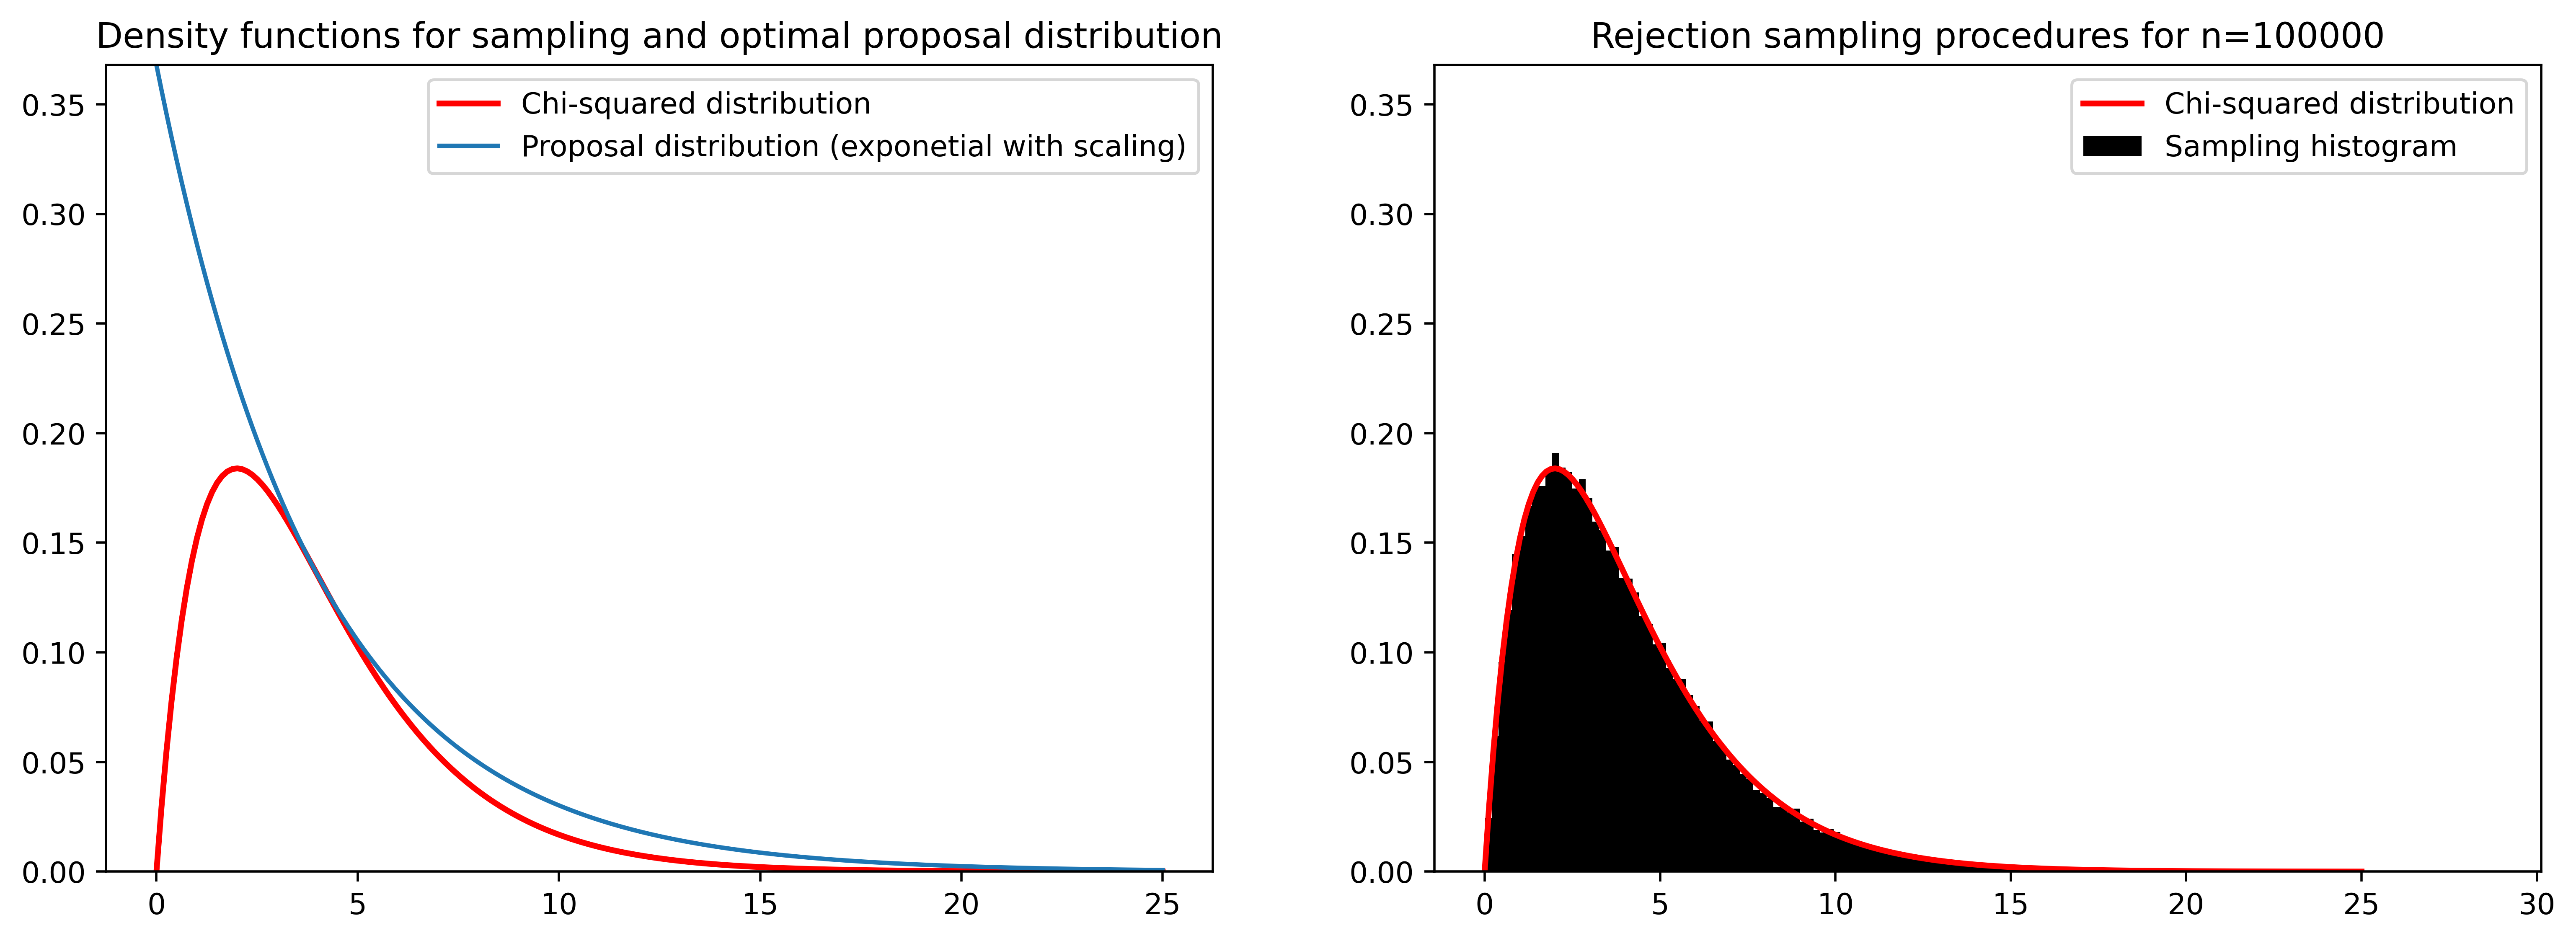

In [15]:
x_range = np.linspace(0, 25, 200)
p = chi_sq_density(x_range, nu)
q = scaling_exp_density(x_range, lam, M)

plt.figure(figsize=(15, 5), dpi=500)
plt.subplot(1, 2, 1)
plt.plot(x_range, p, color='r', linewidth=2)
plt.plot(x_range, q)
plt.ylim(0, q[0])
plt.legend(['Chi-squared distribution', 'Proposal distribution (exponetial with scaling)'])
plt.title(f"Density functions for sampling and optimal proposal distribution")


plt.subplot(1, 2, 2)
plt.plot(x_range, p, color='r', linewidth=2)
plt.hist(samples, bins=150, density=True, color='k')
plt.ylim(0, q[0])
plt.legend(['Chi-squared distribution', 'Sampling histogram'])
plt.title(f"Rejection sampling procedures for n={n}")
plt.savefig('Q1.pdf', bbox_inches='tight')

In [16]:
print("Sampling acceptance rate:", len(samples)/n, "\nTheoretical acceptance rate:", np.round(1/M, 5),
      "\nDifference between two acceptance rates above:", abs(np.round(len(samples)/n-1/M, 5)))

Sampling acceptance rate: 0.68098 
Theoretical acceptance rate: 0.67957 
Difference between two acceptance rates above: 0.00141


The difference between actual and theoretical sampling rate is less than 1e-2, which is indeed closed.

## Q2: Sample from a mixture of chi-squared

In [17]:
def chi_reject_sampler(nu):
    lam = 1/nu
    M = optimal_M(nu)
    while True:
        x = exp_sampling(lam)
        u = np.random.uniform()
        if u<=chi_sq_density(x, nu)/scaling_exp_density(x, lam, M):
            return x

def mixture_density(x, w, nu):
    return w[0]*chi_sq_density(x, nu[0]) + w[1]*chi_sq_density(x, nu[1]) + w[2]*chi_sq_density(x, nu[2])

In [18]:
w = [0.2, 0.5, 0.3]
cdf = np.cumsum(w)
nu = [4, 16, 40]

mix_samples = []
n =  100000
for i in range(n):
    u = np.random.uniform()
    for j in range(len(cdf)):
        if u < cdf[j]:
            mix_samples.append(chi_reject_sampler(nu[j]))
            break

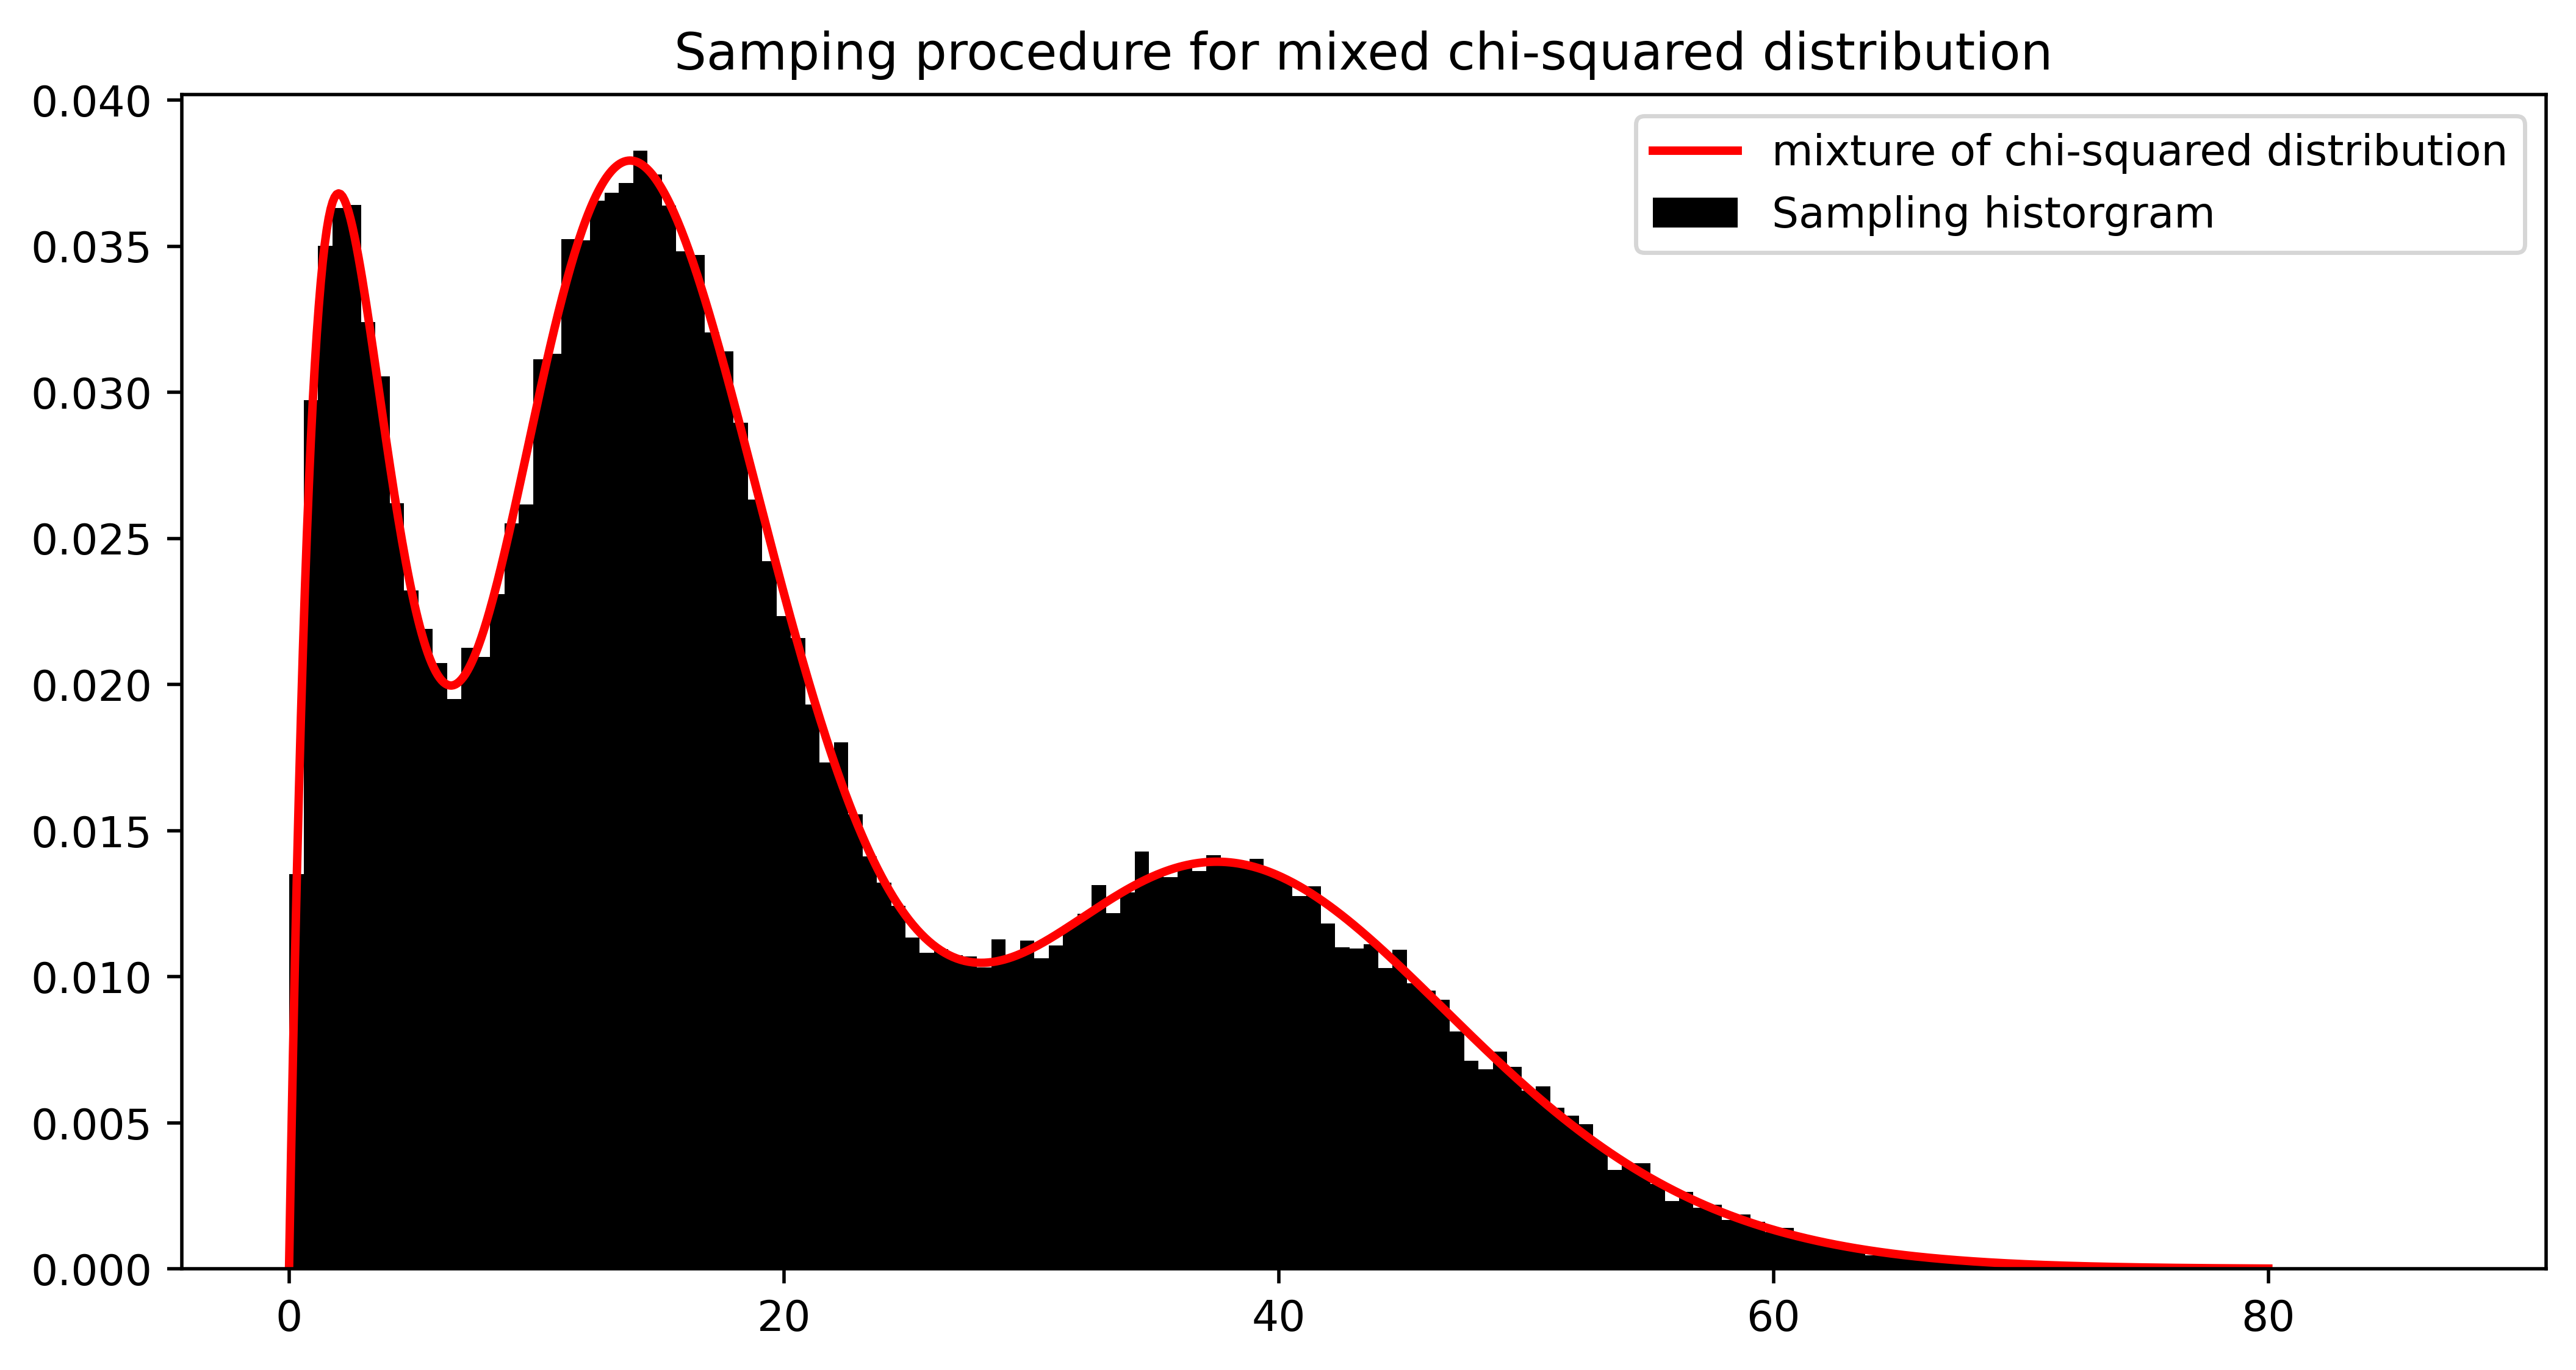

In [19]:
plt.figure(figsize=(10, 5), dpi=500)
xx = np.linspace(0, 80 , 1000)
plt.plot(xx , mixture_density(xx, w, nu), color='r', linewidth=2)
plt.hist(mix_samples, bins=150, density=True, color='black')
plt.legend(['mixture of chi-squared distribution', 'Sampling historgram'])
plt.title("Samping procedure for mixed chi-squared distribution")
plt.savefig('Q2.pdf', bbox_inches='tight')